In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

In [2]:
df= pd.read_csv("/content/info_error.csv")

In [3]:
df1= df.copy()

In [4]:
df1

,static_text,log_level,preprocessed_text
0,Ignoring invalid region for server | ; cell=,error,ignor invalid region server
1,Added * regions to meta.,info,ad region meta
2,Updated * in hbase:meta,info,updat hbase meta
3,Deleted table | state from META,info,delet tabl state meta
4,Updated row * with server=,info,updat row
...,...,...,...
7210,not executing watch [*] on this scheduler beca...,info,execut watch schedul paus
7211,SpnegoClient with userPrincipalName : *,info,spnegocli userprincipalnam
7212,"privileged action exception, with root cause",error,privileg action except root caus
7213,SimpleKdcLdapServer started.,info,simplekdcldapserv start


In [5]:
df1['log_level'].value_counts()

info     3903
error    3312
Name: log_level, dtype: int64

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
df1['preprocessed_text'].fillna('', inplace=True)
df1 = df1.dropna(subset=['preprocessed_text'])

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df1['preprocessed_text'])

In [10]:
# Label encoding
df1['log_level'] = df1['log_level'].map({'info': 0, 'error': 1})
y = df['log_level']

In [11]:
df1

,static_text,log_level,preprocessed_text
0,Ignoring invalid region for server | ; cell=,1,ignor invalid region server
1,Added * regions to meta.,0,ad region meta
2,Updated * in hbase:meta,0,updat hbase meta
3,Deleted table | state from META,0,delet tabl state meta
4,Updated row * with server=,0,updat row
...,...,...,...
7210,not executing watch [*] on this scheduler beca...,0,execut watch schedul paus
7211,SpnegoClient with userPrincipalName : *,0,spnegocli userprincipalnam
7212,"privileged action exception, with root cause",1,privileg action except root caus
7213,SimpleKdcLdapServer started.,0,simplekdcldapserv start


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
model=RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [16]:

y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, classification_report

In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [19]:
print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.8925848925848926
              precision    recall  f1-score   support

       error       0.88      0.90      0.89       692
        info       0.90      0.89      0.90       751

    accuracy                           0.89      1443
   macro avg       0.89      0.89      0.89      1443
weighted avg       0.89      0.89      0.89      1443



done
done
['info' 'info' 'info' 'info' 'info' 'error' 'info' 'info' 'error']
Accuracy: 0.67
Precision: 0.57
Recall: 1.00
F1 Score: 0.73
Confusion Matrix:
[[2 3]
 [0 4]]


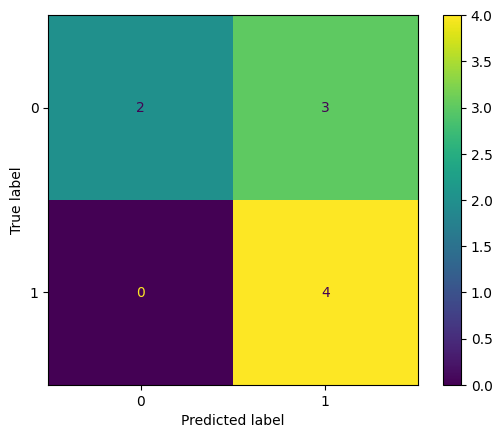

In [20]:
#This need tobe edited for we and  wi


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix#, plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Referred to https://learn.microsoft.com/en-us/previous-versions/windows/desktop/bb226812(v=vs.85) to construct representative log messages.
messages = ["Out of memory", "File format does not match required format","Near memory limit", "Program crashed when loading file", "File not found", "Could not complete operation index out of bounds.", "File Transfer Complete", "File loaded", "Timeout system connection could not be established"]
#The codding for the log messages is: {INFO: 1, ERROR:0}.
true_labels = [0,0,1,1,0,0,1,1,0]

#Feature extraction using TF-IDF
message_Vect = tfidf_vectorizer.transform(messages)
print('done')
predicted_labels = model.predict(message_Vect)
predicted_lables_bin = []
for i in predicted_labels:
    if i=='info':
        predicted_lables_bin.append(1)
    else:
        predicted_lables_bin.append(0)

print('done')
#Calculates accuracy
accuracy = accuracy_score(true_labels,predicted_lables_bin)
print(predicted_labels)
#Calculate precision, recall, and F1 score
precision = precision_score(true_labels,predicted_lables_bin)
recall = recall_score(true_labels, predicted_lables_bin)
f1 = f1_score(true_labels, predicted_lables_bin)

#Calculate confusion matrix
confusion = confusion_matrix(true_labels, predicted_lables_bin)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)

import matplotlib.pyplot as plt
cm = confusion_matrix(true_labels, predicted_lables_bin)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()

plt.show()

In [21]:
from sklearn.svm import SVC

In [22]:
model1=SVC()
model1.fit(X_train, y_train)

SVC()

In [23]:
y_pred = model1.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, classification_report

In [25]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [26]:
print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.8884268884268884
              precision    recall  f1-score   support

       error       0.89      0.87      0.88       692
        info       0.89      0.90      0.89       751

    accuracy                           0.89      1443
   macro avg       0.89      0.89      0.89      1443
weighted avg       0.89      0.89      0.89      1443



done
done
['info' 'info' 'info' 'info' 'info' 'error' 'info' 'info' 'error']
Accuracy: 0.67
Precision: 0.57
Recall: 1.00
F1 Score: 0.73
Confusion Matrix:
[[2 3]
 [0 4]]


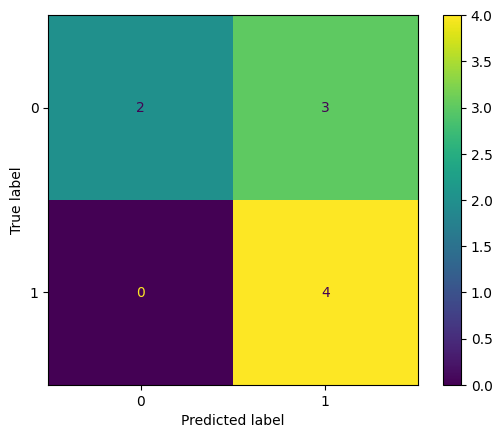

In [27]:
#This need tobe edited for we and  wi


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix#, plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Referred to https://learn.microsoft.com/en-us/previous-versions/windows/desktop/bb226812(v=vs.85) to construct representative log messages.
messages = ["Out of memory", "File format does not match required format","Near memory limit", "Program crashed when loading file", "File not found", "Could not complete operation index out of bounds.", "File Transfer Complete", "File loaded", "Timeout system connection could not be established"]
#The codding for the log messages is: {INFO: 1, ERROR:0}.
true_labels = [0,0,1,1,0,0,1,1,0]

#Feature extraction using TF-IDF
message_Vect = tfidf_vectorizer.transform(messages)
print('done')
predicted_labels = model1.predict(message_Vect)
predicted_lables_bin = []
for i in predicted_labels:
    if i=='info':
        predicted_lables_bin.append(1)
    else:
        predicted_lables_bin.append(0)

print('done')
#Calculates accuracy
accuracy = accuracy_score(true_labels,predicted_lables_bin)
print(predicted_labels)
#Calculate precision, recall, and F1 score
precision = precision_score(true_labels,predicted_lables_bin)
recall = recall_score(true_labels, predicted_lables_bin)
f1 = f1_score(true_labels, predicted_lables_bin)

#Calculate confusion matrix
confusion = confusion_matrix(true_labels, predicted_lables_bin)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)

import matplotlib.pyplot as plt
cm = confusion_matrix(true_labels, predicted_lables_bin)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()

plt.show()